In [1]:
import numpy as np
import pandas as pd
from scipy.stats import levene, shapiro, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
# Anova test - one way Anova Example

# Mean Scores of 3 Archers
# Anova helps in testing if the mean scores of all archers are the same or not
# Null Hypothesis: Means are equal across all groups
# Alternate Hypothesis: Atleast one of the means are significantly different

data = np.rec.array([
('Pat', 5),
('Pat', 4),
('Pat', 4),
('Pat', 3),
('Pat', 9),
('Pat', 4),
('Jack', 4),
('Jack', 8),
('Jack', 7),
('Jack', 5),
('Jack', 1),
('Jack', 5),
('Alex', 9),
('Alex', 8),
('Alex', 8),
('Alex', 10),
('Alex', 5),
('Alex', 10)], dtype = [('Archer','|U5'),('Score', '<i8')])

In [3]:
# Performing Shapiro and levenes test to confirm assumptions of Normality & Equal Variances

# Shapiro Test
# Null Hypothesis - Data is normally distributed
# Alternate Hypothesis - Data is not normally distributed

shapiro(data[data['Archer'] == 'Pat'].Score)

# P-value<0.05 hence data is not normal
# (However, ANOVA is robust to violation of normality rule, provided variances are equal)
# Repeat above shapiro test for other 2 archers as well

ShapiroResult(statistic=0.7501100301742554, pvalue=0.019969742745161057)

In [4]:
shapiro(data[data['Archer'] == 'Jack'].Score)

ShapiroResult(statistic=0.9515655040740967, pvalue=0.7529401779174805)

In [5]:
data[data['Archer'] == 'Alex'].Score.mean()

8.333333333333334

In [6]:
shapiro(data[data['Archer'] == 'Alex'].Score)

ShapiroResult(statistic=0.8616125583648682, pvalue=0.19476738572120667)

In [7]:
# Levene's Test

# H0: All variances are equal
# Ha: Atleast one of the variances not equal

levene(data[data['Archer'] == 'Pat'].Score,
                      data[data['Archer'] == 'Jack'].Score,
                      data[data['Archer'] == 'Alex'].Score)

# p-value > 0.05 hence all variances are equal

LeveneResult(statistic=0.14957264957264957, pvalue=0.862344253520078)

In [8]:
f, p = f_oneway(data[data['Archer'] == 'Pat'].Score,
                      data[data['Archer'] == 'Jack'].Score,
                      data[data['Archer'] == 'Alex'].Score)
 
print ('One-way ANOVA')
print ('=============')

# Null Hypothesis - All population means are equal
# Alternative Hypothesis - Population means are not equal
 
print ('F value:', f)
print ('P value:', p, '\n')

# Since p-value<0.05 , we say that atleast one of the means is significantly different

One-way ANOVA
F value: 4.999999999999998
P value: 0.021683749320078414 



In [9]:
mc = MultiComparison(data['Score'], data['Archer'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Alex   Jack  -3.3333 0.0435 -6.5755 -0.0911   True
  Alex    Pat     -3.5 0.0337 -6.7422 -0.2578   True
  Jack    Pat  -0.1667    0.9 -3.4089  3.0755  False
----------------------------------------------------
['Alex' 'Jack' 'Pat']


In [10]:
# Let us import some data for our next analysis (2 way ANOVA). 
# This time some data on tooth growth:

data2 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/tooth_growth_csv')

In [11]:
data2

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5
5,10.0,VC,0.5
6,11.2,VC,0.5
7,11.2,VC,0.5
8,5.2,VC,0.5
9,7.0,VC,0.5


In [12]:
data2.describe()

,len,dose
count,60.000000,60.000000
mean,18.813333,1.166667
std,7.649315,0.628872
min,4.200000,0.500000
25%,13.075000,0.500000
50%,19.250000,1.000000
75%,25.275000,2.000000
max,33.900000,2.000000


In [13]:
data2['supp'].describe()

count     60
unique     2
top       VC
freq      30
Name: supp, dtype: object

(array([5., 0., 2., 2., 1., 4., 4., 5., 5., 2.]),
 array([ 8.2 , 10.47, 12.74, 15.01, 17.28, 19.55, 21.82, 24.09, 26.36,
        28.63, 30.9 ]),
 <a list of 10 Patch objects>)

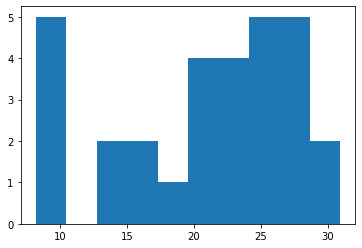

In [14]:
plt.hist(data2[data2['supp'] == 'OJ'].len)

(array([5., 2., 3., 4., 6., 1., 3., 3., 1., 2.]),
 array([ 4.2 ,  7.17, 10.14, 13.11, 16.08, 19.05, 22.02, 24.99, 27.96,
        30.93, 33.9 ]),
 <a list of 10 Patch objects>)

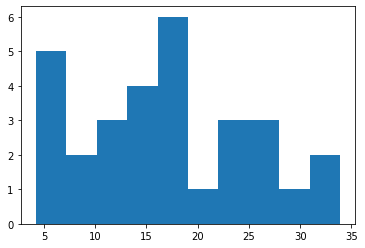

In [15]:
plt.hist(data2[data2['supp'] == 'VC'].len)

In [16]:
# From histogram we can conclude that data is not normal

# Perform levene's test for supp and len separately

levene(data2[data2['supp'] == 'OJ'].len,data2[data2['supp'] == 'VC'].len)

# pvalue>0.05 , hence variances are equal

LeveneResult(statistic=1.2135720656945064, pvalue=0.2751764616144053)

In [17]:
levene(data2[data2['dose'] == 0.5].len,data2[data2['dose'] == 1.0].len,data2[data2['dose'] == 2.0].len)

#pvalue>0.05 hence variances are equal

LeveneResult(statistic=0.6457341109631506, pvalue=0.5280694573759905)

In [18]:
formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
#formula = 'len ~ C(supp)'
#formula = 'len ~ C(dose)'
model = ols(formula, data2).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                      sum_sq    df          F        PR(>F)
C(supp)           205.350000   1.0  15.571979  2.311828e-04
C(dose)          2426.434333   2.0  91.999965  4.046291e-18
C(supp):C(dose)   108.319000   2.0   4.106991  2.186027e-02
Residual          712.106000  54.0        NaN           NaN


In [19]:
import seaborn as sns

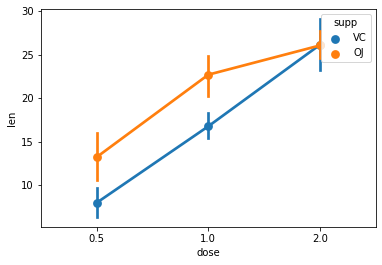

In [20]:
sns.pointplot(x="dose",y="len",data=data2,hue="supp")